# Bench

Benchmark testing between ROOT-based fire and HDF5-based fire.

The actual compiling and running of this module is done in the
[benchmark GitHub action](https://github.com/tomeichlersmith/ldmx-rootless/blob/main/.github/workflows/bench.yml).

In short, after compiling whichever version of the framework we are
using against this module, we run the command

```bash
ldmx time fire config.py <num-events>
```

To time how long the processing takes. We do this over several trials
and average the results for the time in seconds, and then

```bash
stat output/*
```

To obtain how large the output data file is in bytes.

## This File
This jupyter notebook uses a manually written CSV file where the average times and the output file sizes are copied from the GitHub action logs. These numbers could also be generated manually on a local machine if you so wish.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def bench_plot(events, hdf5_time, hdf5_size, root_time, root_size) :
    """
    Parameters
    ----------
    events : numpy.array
        N events values benchmarked at for both hdf5 and root data
    """
    fig, ((raw_time,raw_size),(ratio_time,ratio_size)) = plt.subplots(ncols=2,nrows=2, sharex='col')
    fig.set_size_inches(11,7)
    plt.suptitle('Comparison Between HDF5 and ROOT')
    plt.subplots_adjust(wspace=0.3, hspace=0.)

    raw_time.set_ylabel('Real Time [s]')
    raw_time.set_yscale('log')
    raw_time.plot(events, hdf5_time, label='hdf5')
    raw_time.plot(events, root_time, label='root')
    raw_time.legend()

    ratio_time.set_xscale('log')
    ratio_time.set_xlabel('N Events')
    ratio_time.set_ylabel('hdf5 Time / root Time')
    ratio_time.set_ylim(bottom=0.,top=1.)
    ratio_time.plot(events, hdf5_time/root_time, 
                label='hdf5/root', color = 'black')

    raw_size.set_ylabel('Output File Size [MB]')
    raw_size.set_yscale('log')
    raw_size.plot(events, hdf5_size/1e6)
    raw_size.plot(events, root_size/1e6)

    ratio_size.set_xscale('log')
    ratio_size.set_xlabel('N Events')
    ratio_size.set_ylabel('hdf5 Size / root Size')
    ratio_size.set_ylim(bottom=0.5,top=5.)
    ratio_size.plot(events, hdf5_size/root_size,
               color='black')

    plt.show()
    
def plot_csv(name) :
    data = pd.read_csv('double_data.csv')
    
    bench_plot(
        data[data['serializer']=='hdf5']['events'].to_numpy(),
        data[data['serializer']=='hdf5']['time'].to_numpy(),
        data[data['serializer']=='hdf5']['size'].to_numpy(),
        data[data['serializer']=='root']['time'].to_numpy(),
        data[data['serializer']=='root']['size'].to_numpy()
    )


## Double Data
First, we benchmarked both frameworks serializing data that was a `std::vector<double>` whose size and values were randomly distributed. The random number generators were not seeded so that both frameworks would recieve the exact same data.

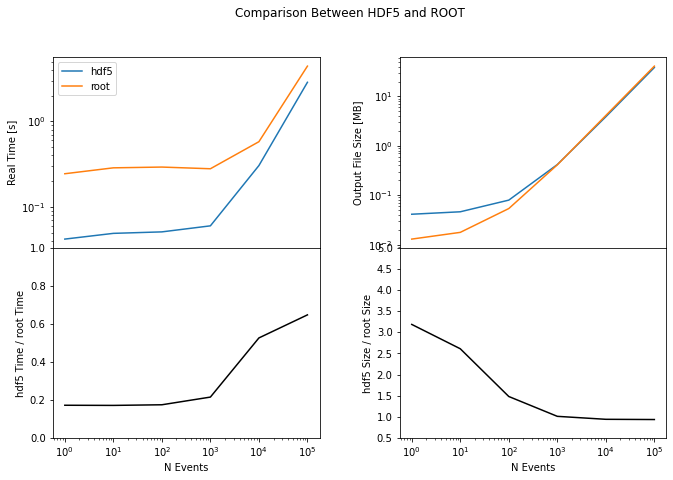

In [2]:
plot_csv('double_data.csv')

## User Class Data
Next, we ran another benchmark where the user module defines a class `bench::Hit` and the framework handles serializing a `std::vector<bench::Hit>` whose size and values are randomly distributed. Again, the generator is unseeded so that both frameworks recieve the same data. This benchmark is much closer to our actual use case where most of our data objects are vectors of different user-defined classes.